**Part 1**

In [33]:
import re

def clean_text(text):
    # Define stop words to remove
    stop_words = ["bought", "I", "for", "and", "with", "a", "of", "each", "dollar"]

    # Remove stop words
    cleaned_text = re.sub(r'\b(?:{})\b'.format('|'.join(stop_words)), '', text, flags=re.IGNORECASE)

    # Remove extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

def generate_bill(text):
    # Clean the text
    cleaned_text = clean_text(text)

    # Define regex patterns
    price_pattern = r'(\d+(?:,\d+)?)'  # Pattern to match unit price
    quantity_pattern = r'\b(?:one|two|three|four|five|six|seven|eight|nine|ten)\b'  # Pattern to match quantity words
    item_pattern = r'([\w\s]+\w)'  # Pattern to match item names with spaces

    # Find all matches of item names, quantities, and prices
    items = re.findall(item_pattern, cleaned_text)
    quantities = re.findall(quantity_pattern, cleaned_text)
    prices = re.findall(price_pattern, cleaned_text)

    print(quantities)
    print(prices)
    print(items)
    
    # Convert quantity strings to numeric values
    quantity_dict = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
    }
    quantities_numeric = []
    for q in quantities:
        if q.isdigit():
            quantities_numeric.append(int(q))
        else:
            quantities_numeric.append(quantity_dict.get(q))

    # Prepare the bill table
    bill_table = "Product Quantity Unit Price Total Price\n"
    for item, quantity, price in zip(items, quantities_numeric, prices):
        # Replace comma with dot in price
        price = price.replace(',', '.')
        total_price = float(price) * quantity
        # Remove quantity and price from the item name
        item = re.sub(quantity_pattern, '', item).strip()
        item = re.sub(price_pattern, '', item).strip()
        bill_table += f"{item} {quantity} {price} {total_price}\n"

    return bill_table

# Example usage
user_text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar"
generated_bill = generate_bill(user_text)
print("Generated Bill:\n", generated_bill)


['three', 'four', 'one']
['150', '1,2', '4,5']
['three Samsung smartphones 150', ' four kilos fresh banana 1', '2 kilogram one Hamburger 4']
Generated Bill:
 Product Quantity Unit Price Total Price
Samsung smartphones 3 150 450.0
kilos fresh banana 4 1.2 4.8
kilogram  Hamburger 1 4.5 4.5



**Part 2**

In [34]:
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client["mydatabase"]
collection = db["mycollection"]

# Retrieve data from MongoDB
data = [article['summary'] for article in collection.find()]

# Apply one hot encoding
cv = CountVectorizer(binary=True)
one_hot_encoded = cv.fit_transform(data)

# Apply bag of words
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data)

# Apply TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data)

# Print the shapes of the matrices
print("One Hot Encoded shape:", one_hot_encoded)
print("Bag of Words shape:", bag_of_words)
print("TF-IDF shape:", tfidf_matrix)


One Hot Encoded shape:   (0, 289)	1
  (0, 184)	1
  (0, 96)	1
  (0, 56)	1
  (0, 226)	1
  (0, 251)	1
  (0, 234)	1
  (0, 212)	1
  (0, 81)	1
  (0, 329)	1
  (0, 125)	1
  (0, 101)	1
  (0, 2)	1
  (0, 39)	1
  (0, 238)	1
  (0, 241)	1
  (0, 250)	1
  (0, 264)	1
  (0, 326)	1
  (0, 107)	1
  (0, 334)	1
  (0, 85)	1
  (1, 56)	1
  (1, 226)	1
  (1, 234)	1
  :	:
  (138, 188)	1
  (138, 269)	1
  (138, 340)	1
  (138, 137)	1
  (138, 157)	1
  (138, 200)	1
  (138, 291)	1
  (139, 125)	1
  (139, 39)	1
  (139, 241)	1
  (139, 43)	1
  (139, 143)	1
  (139, 46)	1
  (139, 104)	1
  (139, 332)	1
  (139, 185)	1
  (139, 6)	1
  (139, 221)	1
  (139, 4)	1
  (139, 205)	1
  (139, 199)	1
  (139, 28)	1
  (139, 272)	1
  (139, 128)	1
  (139, 135)	1
Bag of Words shape:   (0, 289)	1
  (0, 184)	1
  (0, 96)	1
  (0, 56)	1
  (0, 226)	1
  (0, 251)	1
  (0, 234)	1
  (0, 212)	1
  (0, 81)	1
  (0, 329)	1
  (0, 125)	1
  (0, 101)	1
  (0, 2)	1
  (0, 39)	1
  (0, 238)	1
  (0, 241)	1
  (0, 250)	1
  (0, 264)	1
  (0, 326)	1
  (0, 107)	1
  (0, 334)	1


In [35]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


word_to_visualize = 'فلسطين'

tokenized_data = []
for article in data:
    tokenized_article = word_tokenize(article)
    tokenized_article = [word if word != 'غزة' else word_to_visualize for word in tokenized_article]
    tokenized_data.append(tokenized_article)

# Apply Skip Gram

skipgram_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# Apply CBOW
cbow_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, sg=0)

# Example of accessing word vectors
print("Word Vector for '{}' (Skip Gram):\n".format(word_to_visualize), skipgram_model.wv[word_to_visualize])
print("Word Vector for '{}' (CBOW):\n".format(word_to_visualize), cbow_model.wv[word_to_visualize])


Word Vector for 'فلسطين' (Skip Gram):
 [-0.07798181  0.12938693  0.06594058  0.06614815  0.03943171 -0.19016482
  0.17453602  0.2791015  -0.08995366 -0.04998205 -0.06220797 -0.1465445
 -0.03729199  0.01168888 -0.05747877 -0.10752377  0.04027731 -0.14739652
 -0.07803086 -0.2707618  -0.02417034  0.02076571  0.05844388 -0.08994578
 -0.07080556  0.06982593 -0.02764714 -0.16636561 -0.1545008  -0.03190444
  0.15646993  0.05527054 -0.02622614  0.02625811 -0.10877458  0.16248071
  0.0783325  -0.1428693  -0.1251496  -0.25280574  0.06205977 -0.20677614
 -0.02070479  0.05816941  0.24186914  0.03341392 -0.05151759 -0.08980318
  0.03943578  0.0202107   0.17227234 -0.07086798  0.07693421  0.02834154
 -0.20209168  0.12515834  0.02016791  0.04915464 -0.21465111  0.10663226
  0.01845795  0.05615082  0.10026982 -0.1598153  -0.22045295 -0.00070039
  0.14155324  0.12325991 -0.21329157  0.13542381 -0.12629686  0.00481963
  0.12152814 -0.03004334  0.11935826  0.17049326  0.04781061  0.01652142
 -0.19693695 

In [36]:
from gensim.models import FastText

# Apply Glove
glove_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=1)

# Apply FastText
fasttext_model = FastText(sentences=tokenized_data, vector_size=100, window=5, sg=0)

# Example of accessing word vectors
print("Word Vector for '{}' (GloVe):\n".format(word_to_visualize), glove_model.wv[word_to_visualize])
print("Word Vector for '{}' (FastText):\n".format(word_to_visualize), fasttext_model.wv[word_to_visualize])


Word Vector for 'فلسطين' (GloVe):
 [ 0.03248764  0.2770059   0.28048733  0.13343303 -0.18374303  0.01059113
  0.23647298  0.19687672 -0.19296531  0.09605648 -0.22533725 -0.08186827
  0.00908516  0.03992198  0.04959331 -0.11041797 -0.14374101 -0.01323253
  0.01822661 -0.18869334 -0.2430696  -0.06126858 -0.0702818   0.14184345
 -0.03991154 -0.05911289  0.14001729  0.13217151 -0.1296639   0.02465926
  0.22870907  0.202063   -0.04677892 -0.08965651  0.03082144  0.1390111
 -0.00426427 -0.10728717 -0.12954684  0.03291352  0.07661403  0.08876289
  0.00997612  0.09748769  0.05043428  0.06620212 -0.10691524 -0.08333249
  0.12037562  0.03232977 -0.07861616 -0.2629104  -0.05095204 -0.09813754
  0.3243689   0.17118019  0.22433984 -0.19460428 -0.10047248  0.14988248
  0.04967851  0.12195976  0.3519532   0.11832197 -0.0012697   0.07508962
  0.08755236  0.02796827  0.00094796 -0.18083514 -0.18764608  0.05423738
  0.27373418 -0.17548358  0.00315533  0.09739056  0.07387017  0.0530595
  0.00886023 -0.00

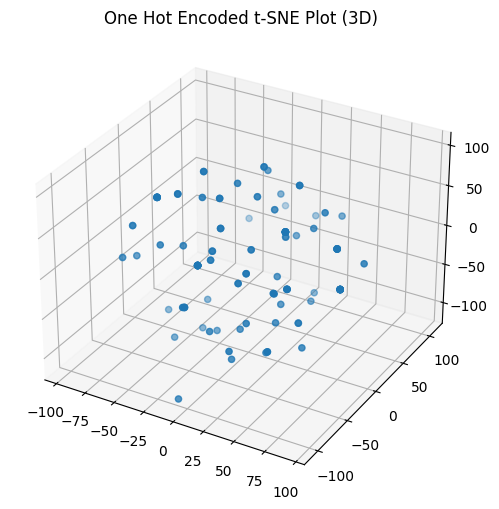

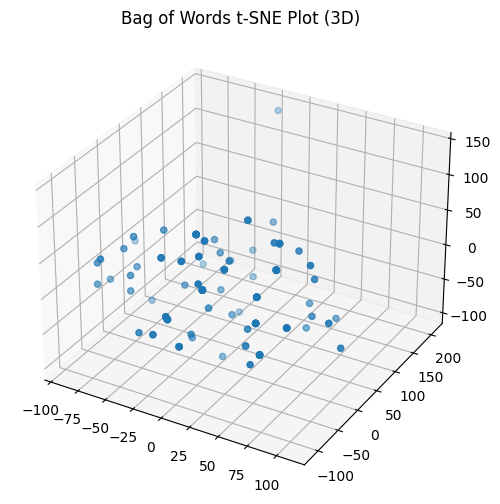

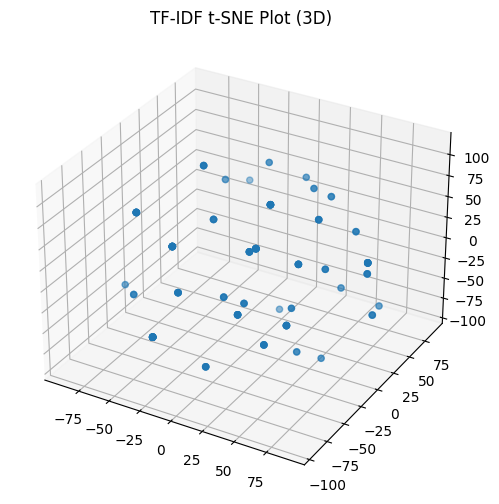

General Conclusion:
Word embedding techniques like Word2Vec, GloVe, and FastText capture semantic relationships between words, making them suitable for NLP tasks.
TF-IDF is useful for representing the importance of words in a document.
Bag of Words and one hot encoding are simpler techniques that do not consider word order but can be effective in certain contexts.


In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to plot vectors using t-SNE in 3D
def plot_vectors_3d(vectors, model_name):
    tsne = TSNE(n_components=3, random_state=0)
    vectors_tsne = tsne.fit_transform(vectors)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], vectors_tsne[:, 2])
    ax.set_title(f'{model_name} t-SNE Plot (3D)')
    plt.show()

# Plotting all the encoded/vectorized vectors in 3D
plot_vectors_3d(one_hot_encoded.toarray(), 'One Hot Encoded')
plot_vectors_3d(bag_of_words.toarray(), 'Bag of Words')
plot_vectors_3d(tfidf_matrix.toarray(), 'TF-IDF')
# Add similar lines for Word2Vec, GloVe, and FastText vectors

# Provide a general conclusion
print("General Conclusion:")
print("Word embedding techniques like Word2Vec, GloVe, and FastText capture semantic relationships between words, making them suitable for NLP tasks.")
print("TF-IDF is useful for representing the importance of words in a document.")
print("Bag of Words and one hot encoding are simpler techniques that do not consider word order but can be effective in certain contexts.")


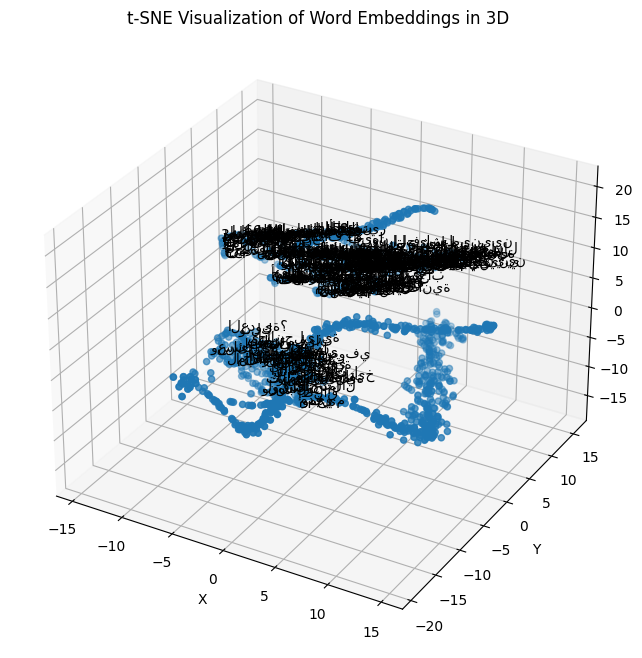

In [38]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get all the words in the dataset
all_words = set()
for article in data:
    all_words.update(word_tokenize(article))

# Apply Skip Gram
skipgram_vectors = []
for word in all_words:
    try:
        vector = skipgram_model.wv[word]
        skipgram_vectors.append(vector)
    except KeyError:
        pass
skipgram_vectors_array = np.array(skipgram_vectors).reshape(-1, 100)

# Apply CBOW
cbow_vectors = []
for word in all_words:
    try:
        vector = cbow_model.wv[word]
        cbow_vectors.append(vector)
    except KeyError:
        pass
cbow_vectors_array = np.array(cbow_vectors).reshape(-1, 100)

# Apply Glove
glove_vectors = []
for word in all_words:
    try:
        vector = glove_model.wv[word]
        glove_vectors.append(vector)
    except KeyError:
        pass
glove_vectors_array = np.array(glove_vectors).reshape(-1, 100)

# Apply FastText
fasttext_vectors = []
for word in all_words:
    try:
        vector = fasttext_model.wv[word]
        fasttext_vectors.append(vector)
    except KeyError:
        pass
fasttext_vectors_array = np.array(fasttext_vectors).reshape(-1, 100)

# Concatenate all the vector matrices into one array
all_vectors_array = np.concatenate((skipgram_vectors_array, cbow_vectors_array, glove_vectors_array, fasttext_vectors_array))

# Apply t-SNE with 3 components for 3D visualization
tsne_3d = TSNE(n_components=3, random_state=42)
vectors_tsne_3d = tsne_3d.fit_transform(all_vectors_array)

# Plot the vectors in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_tsne_3d[:, 0], vectors_tsne_3d[:, 1], vectors_tsne_3d[:, 2])
for i, word in enumerate(all_words):
    ax.text(vectors_tsne_3d[i, 0], vectors_tsne_3d[i, 1], vectors_tsne_3d[i, 2], word, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('t-SNE Visualization of Word Embeddings in 3D')
plt.show()
